#### Leonardo Pereira Medeiros

## Introdução

Este projeto consiste na implementação de um sistema físico 2D, com a finalidade de aplicar técnicas de vetorização definidas pelo método SIMD (Single Instruction, Multiple Data), e analisar suas vantagens quanto ao ganho de desempenho de tempo de execução.

A Vetorização é o processo de usar registradores vetoriais, ao invés de registradores escalares, em uma tentativa de fazer o programa rodar mais rápido, ao converter um algoritmo de operar um valor por vez para operar um conjunto de valores de uma só vez, ou seja, uma unica instrução é aplicada a um conjunto de elementos (vetor) de forma paralela

Um método de auto vetorização pode ser aplicado em um algoritmo de forma automática, se especificado durante a compilação, porém não é garantido que este funcione, pois depende da estrutura do código implementado, logo também é possível utilizar funções simd ao escrever um algoritmo, de forma a garantir que a vetorização ocorra.

Para a vetorização a flag ftree-vectorize deve ser utilizada durante a compilação, com flags adicionais que definem outros tipos de arquitetura do processo de vetorização como mavx e mavx2. Ambas estruturas possuem maior desempenho, por possuírem um vetor maior para armazenamento, mas ao comparar o mavx com o mavx2, este se destaca neste quesito, logo tem-se que essas arquiteturas apresentadas possuem uma limitação, definida pelo tamanho do registrador vetorial.

## Descrição do Problema

O problema a ser tratado consiste em uma simulação de física 2D, dentro desse sistema há corpos se movimentando em um plano que possui tamanho limite de campo, e coeficiente de atrito dinâmico, considerar as colisões entre os retângulos e as paredes definidas pelo tamanho limite

para tal sistema são feitas algumas simplificações, em que todo corpo é representado por um retângulo, que possui massa, posição, velocidade e aceleração, estes não possuem velocidade angular, as colisões nesse sistema são sempre totalmente elásticas (a energia cinética total se conserva), na ocasião em que no próximo movimento do corpo haverá colisão somente altera-se seus vetores de velocidade. Ou seja, em cada iteração só é atualizado a posição de um corpo se ele não colidir com outro corpo.


## Implementação

O programa contém dois componentes principais, o metodo main e a classe Retangulo.

A classe retângulo representa a classe dos corpos do sistema, cada corpo é criado ao instanciar esse componente passando para seu construtor as informações iniciais obtidas pelo arquivo de input, esta classe possui o método move, responsável por calcular a nova posição de cada componente em cada iteração.

O método main utiliza métodos auxiliares para ler o input inicial, e mostrar o estado dos componentes, definido por uma frequência no arquivo de input, sua principal função é executar o fluxo lógico do algoritmo, movendo todos os objetos, e em seguida analisando possíveis colisões com a parede ou com os outros corpos do sistema, para decidir sobre alterar ou não a posição do componente, assim como alterar sua velocidade;

## Testes

Os inputs selecionados para testar o desempenho da aplicação de técnicas de vetorização, foram formulados de forma a tentar levar ao máximo o processamento da cpu, como o programa exige mais processamento quando há um grande número de iterações e um grande número de corpos no sistema, esses valores foram testados de forma crescente, e com grandes intervalos, a fim de tentar tornar mais visível o poder de aplicar essa técnica para diferentes requisições de processamento, com a finalidade de a aumentar o desempenho. 

Logo os seguintes inputs foram usados:

input 1: <br>
Numero de Retangulos: 100<br>
Maximo de Iterações : 10000<br>

input 2:<br>
Numero de Retangulos: 100<br>
Maximo de Iterações : 100000<br>

input 3:<br>
Numero de Retangulos: 100<br>
Maximo de Iterações : 300000<br>

input 4:<br>
Numero de Retangulos: 100<br>
Maximo de Iterações : 500000<br>

Caso queira analisar o resto do conteúdo desses arquivos, todos esses estão no repositório do projeto, dentro da pasta jupyter.

Foi definido como variável de desempenho  o tempo de execução do programa, este foi mensurado com a biblioteca chrono, que fornece funções de alta resolução baseado em clock. Como deseja-se medir apenas o desempenho do algoritmo do sistema 2D implementado, a medição não leva em conta o tempo gasto na leitura do arquivo de input, e outros processos similares.  

Obs: toda a veracidade do código foi testado com um script em python, contido no repositório do projeto, que tem seu modo de uso descrito no README, este script utiliza de testes designados para cada subtarefa, como teste de atrito, colisão com parede, colisão vertical entre corpos, e colisão horizontal entre corpos, com a finalidade de evitar erros.

## Resultados

In [1]:
## Import dependences
import pandas as pd
import sys
import subprocess
import re

In [2]:
## files
_dir    = "../build/"
_files  = ["simulation_O0", "simulation_O1", "simulation_O2", "simulation_O3", "simulation_O3F"]
_inputs = ["input1.txt", "input2.txt", "input3.txt", "input4.txt"]

In [3]:
n_rects   = []
max_iters = []
dic       = {}

## Run files and storage output
for inp in _inputs:
    dic[inp[0:-4]] = {}
      
    for f in _files:
        command = _dir + f + " < " + inp
        stout   = subprocess.check_output(command, shell=True).decode(sys.stdout.encoding)
        dic[inp[0:-4]][f]  = float(stout.split("\n")[-1].split(":")[1])
        #float(re.findall(r"Runtime: (\d+\.\d*)", stout)[0]) 
    
    maxIter = int([v for v in stout.split("\n") if " " not in v and v.isnumeric()][-1]) + 1
    
    with open(inp, 'r') as f:
        nrect = f.read().split("\n")[1]
     
    max_iters.append(maxIter)
    n_rects.append(nrect)

In [4]:
## Generate Dataframe 
s0  = [dic["input1"]["simulation_O0"], dic["input2"]["simulation_O0"], dic["input3"]["simulation_O0"], dic["input4"]["simulation_O0"]]
s1  = [dic["input1"]["simulation_O1"], dic["input2"]["simulation_O1"], dic["input3"]["simulation_O1"], dic["input4"]["simulation_O1"]]
s2  = [dic["input1"]["simulation_O2"], dic["input2"]["simulation_O2"], dic["input3"]["simulation_O2"], dic["input4"]["simulation_O2"]]
s3  = [dic["input1"]["simulation_O3"], dic["input2"]["simulation_O3"], dic["input3"]["simulation_O3"], dic["input4"]["simulation_O3"]]
s3F = [dic["input1"]["simulation_O3F"], dic["input2"]["simulation_O3F"], dic["input3"]["simulation_O3F"], dic["input4"]["simulation_O3F"]]

df = pd.DataFrame({"O0":s0, "O1":s1, "O2":s2, "O3":s3, "O3F":s3F, "N": n_rects , "Itr": max_iters}, index = dic.keys())
df

,Itr,N,O0,O1,O2,O3,O3F
input1,10000,100,4.60946,0.506275,0.487792,0.487105,0.465954
input2,100000,100,48.89020,5.004710,4.550440,4.462970,3.921660
input3,300000,100,152.34700,14.997800,13.274000,13.555200,11.939800
input4,500000,100,257.59900,23.668600,22.524600,23.971600,20.055500


itr : Maximo de iterações realizadas pelo programa, levando em conta que se a soma das velocidade dos retangulos for menor que 0.001 o systema para, cessando as iterações<br>
n   : Quantidade de corpos no sistema

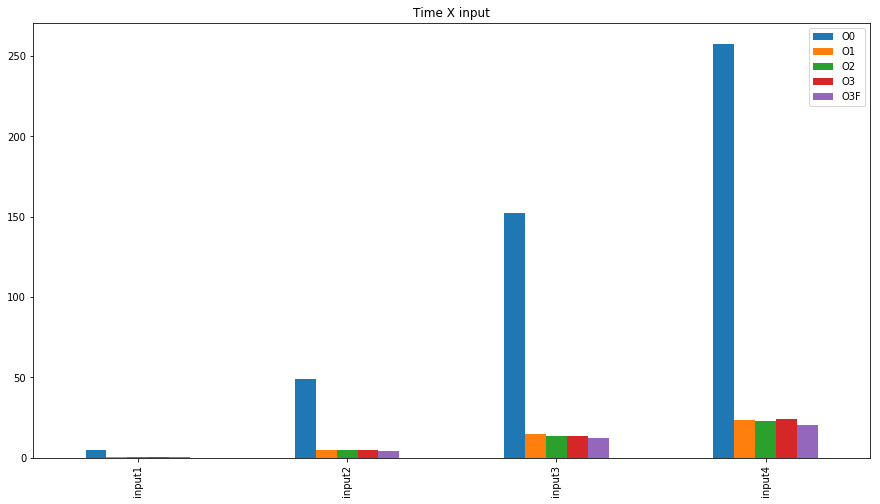

In [8]:
df2 = df.copy().drop(columns=['Itr', 'N'])
df2.plot.bar(figsize = (15,8), title = "Time X input")

## Conclusão

Inicialmente o esperado como resultado para os testes utilizados, é as compilações em O0 sejam a menos eficiente, as compilações em 01, 02 e 03 estejam na segunda colocação de maior desempenho, e as compilações em O3 com as flags free-vectorize e mavx seja a que gere melhores resultados.

O que foi comprovado parcialmente pelos resultados obtidos, como podemos observar o menor desempenho em tempo de execução foi com a compilação O0, porém não há grande diferença entre o desempenho com a compilação 03 e flags, comparadas com as compilações restantes.

Esse fato pode ter ocorrido devido a estrutura do código não suportar muito bem essa melhoria de vetorização, o que pode ser resolvido em atualizações futuras ao utilizar intruções SIMD.


## Especificações da Maquina utilizada

```
Arquitetura:                x86_64
Modo(s) operacional da CPU: 32-bit, 64-bit
Ordem dos bytes:            Little Endian
CPU(s):                     4
Lista de CPU(s) on-line:    0-3
Thread(s) per núcleo:       2
Núcleo(s) por soquete:      2
Soquete(s):                 1
Nó(s) de NUMA:              1
ID de fornecedor:           GenuineIntel
Família da CPU:             6
Modelo:                     61
Nome do modelo:             Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz
Step:                       4
CPU MHz:                    2430.779
CPU MHz máx.:               3000,0000
CPU MHz mín.:               500,0000
BogoMIPS:                   4788.89
Virtualização:              VT-x
cache de L1d:               32K
cache de L1i:               32K
cache de L2:                256K
cache de L3:                4096K
CPU(s) de nó0 NUMA:         0-3
```